In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import os

In [4]:
#read in the csv file
file_path = os.path.join("Resources", "Life_Expectancy_Data.csv")
life_df = pd.read_csv(file_path)

life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
life_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
#trim the dataframe to the columns that we need
life_df = life_df[["Country", "Year", "Status", "Life expectancy ", "Adult Mortality", "Alcohol", 
                   "percentage expenditure", "Hepatitis B", "Measles ", " BMI ", "Polio", "Total expenditure",
                  "Diphtheria ", " HIV/AIDS", "GDP", "Population", "Schooling"]]
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,0.01,71.279624,65.0,1154,19.1,6.0,8.16,65.0,0.1,584.259210,33736494.0,10.1
1,Afghanistan,2014,Developing,59.9,271.0,0.01,73.523582,62.0,492,18.6,58.0,8.18,62.0,0.1,612.696514,327582.0,10.0
2,Afghanistan,2013,Developing,59.9,268.0,0.01,73.219243,64.0,430,18.1,62.0,8.13,64.0,0.1,631.744976,31731688.0,9.9
3,Afghanistan,2012,Developing,59.5,272.0,0.01,78.184215,67.0,2787,17.6,67.0,8.52,67.0,0.1,669.959000,3696958.0,9.8
4,Afghanistan,2011,Developing,59.2,275.0,0.01,7.097109,68.0,3013,17.2,68.0,7.87,68.0,0.1,63.537231,2978599.0,9.5


In [7]:
life_df = life_df.rename(columns={'Life expectancy ': 'Life Expectancy', 
                        'percentage expenditure': 'Percentage Expenditure',
                        'Measles ': 'Measles',
                        ' BMI ': 'BMI',
                        "Total expenditure": "Total Expenditure",
                        "Diphtheria ": "Diphtheria",
                        " HIV/AIDS": "HIV/AIDS"
                        })  

In [8]:
#trim the dataframe to just focus on the effect of schooling on life expectancy and include the country, year, and 
#status columns
schooling_df = life_df[["Country", "Year", "Status", "Life Expectancy", "Schooling"]]
schooling_df.dropna()

,Country,Year,Status,Life Expectancy,Schooling
0,Afghanistan,2015,Developing,65.0,10.1
1,Afghanistan,2014,Developing,59.9,10.0
2,Afghanistan,2013,Developing,59.9,9.9
3,Afghanistan,2012,Developing,59.5,9.8
4,Afghanistan,2011,Developing,59.2,9.5
...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,9.2
2934,Zimbabwe,2003,Developing,44.5,9.5
2935,Zimbabwe,2002,Developing,44.8,10.0
2936,Zimbabwe,2001,Developing,45.3,9.8


In [9]:
#remove rows where schooling == 0
schooling_df = schooling_df.loc[schooling_df["Schooling"] != 0]
schooling_df = schooling_df.dropna()
schooling_df

,Country,Year,Status,Life Expectancy,Schooling
0,Afghanistan,2015,Developing,65.0,10.1
1,Afghanistan,2014,Developing,59.9,10.0
2,Afghanistan,2013,Developing,59.9,9.9
3,Afghanistan,2012,Developing,59.5,9.8
4,Afghanistan,2011,Developing,59.2,9.5
...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,9.2
2934,Zimbabwe,2003,Developing,44.5,9.5
2935,Zimbabwe,2002,Developing,44.8,10.0
2936,Zimbabwe,2001,Developing,45.3,9.8


Text(15, 45, 'r = 0.78')

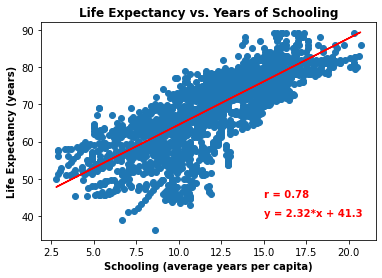

In [33]:
#plot life expectancy vs. schooling
plt.scatter(schooling_df["Schooling"], schooling_df["Life Expectancy"])
plt.title("Life Expectancy vs. Years of Schooling", fontweight="bold")
plt.xlabel("Schooling (average years per capita)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")

#perform regression on life expectancy vs. schooling
(slope, intercept, rvalue, pvalue, stderr) = linregress(schooling_df["Schooling"], schooling_df["Life Expectancy"])
slope = round(slope, 2)
intercept = round(intercept, 2)
rvalue = round(rvalue, 2)
regress_values = (schooling_df["Schooling"]*slope) + intercept
plt.plot(schooling_df["Schooling"], regress_values, "r-")
line_eq = f"y = {slope}*x + {intercept}"
plt.annotate(line_eq, (15, 40), color = "r", fontweight = "bold")
r_eq = f"r = {rvalue}"
plt.annotate(r_eq, (15, 45), color = "r", fontweight = "bold")

In [18]:
#create a df of only developing countries
developing_df = schooling_df.loc[schooling_df["Status"] == "Developing"]
developing_df

,Country,Year,Status,Life Expectancy,Schooling
0,Afghanistan,2015,Developing,65.0,10.1
1,Afghanistan,2014,Developing,59.9,10.0
2,Afghanistan,2013,Developing,59.9,9.9
3,Afghanistan,2012,Developing,59.5,9.8
4,Afghanistan,2011,Developing,59.2,9.5
...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,9.2
2934,Zimbabwe,2003,Developing,44.5,9.5
2935,Zimbabwe,2002,Developing,44.8,10.0
2936,Zimbabwe,2001,Developing,45.3,9.8


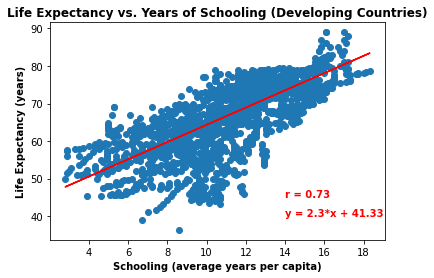

In [32]:
#plot life expectancy vs. schooling for the developing df
plt.scatter(developing_df["Schooling"], developing_df["Life Expectancy"])
plt.title("Life Expectancy vs. Years of Schooling (Developing Countries)", fontweight="bold")
plt.xlabel("Schooling (average years per capita)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")

#perform regression on life expectancy vs. schooling for developing countries
(slope_d1, intercept_d1, rvalue_d1, pvalue_d1, stderr_d1) = linregress(developing_df["Schooling"], developing_df["Life Expectancy"])
slope_d1 = round(slope_d1, 2)
intercept_d1 = round(intercept_d1, 2)
rvalue_d1 = round(rvalue_d1, 2)
regress_values_d1 = (developing_df["Schooling"]*slope_d1) + intercept_d1
plt.plot(developing_df["Schooling"], regress_values_d1, "r-")
line_eq_d1 = f"y = {slope_d1}*x + {intercept_d1}"
plt.annotate(line_eq_d1, (14, 40), color = "r", fontweight = "bold")
r_eq_d1 = f"r = {rvalue_d1}"
plt.annotate(r_eq_d1, (14, 45), color = "r", fontweight = "bold")

plt.show()

In [25]:
#create a df of only developed countries
developed_df = schooling_df.loc[schooling_df["Status"] == "Developed"]
developed_df

,Country,Year,Status,Life Expectancy,Schooling
112,Australia,2015,Developed,82.8,20.4
113,Australia,2014,Developed,82.7,20.4
114,Australia,2013,Developed,82.5,20.3
115,Australia,2012,Developed,82.3,20.1
116,Australia,2011,Developed,82.0,19.8
...,...,...,...,...,...
2532,Switzerland,2004,Developed,81.0,15.1
2533,Switzerland,2003,Developed,85.0,15.0
2534,Switzerland,2002,Developed,84.0,15.2
2535,Switzerland,2001,Developed,82.0,15.2


In [68]:
developed_df["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus',
       'Denmark', 'Germany', 'Hungary', 'Iceland', 'Ireland', 'Italy',
       'Japan', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Romania', 'Singapore', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland'], dtype=object)

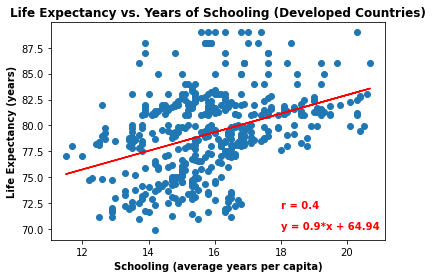

In [31]:
#plot life expectancy vs. schooling for the developed df
plt.scatter(developed_df["Schooling"], developed_df["Life Expectancy"])
plt.title("Life Expectancy vs. Years of Schooling (Developed Countries)", fontweight="bold")
plt.xlabel("Schooling (average years per capita)", fontweight="bold")
plt.ylabel("Life Expectancy (years)", fontweight="bold")

#perform regression on life expectancy vs. schooling for developed countries
(slope_d2, intercept_d2, rvalue_d2, pvalue_d2, stderr_d2) = linregress(developed_df["Schooling"], developed_df["Life Expectancy"])
slope_d2 = round(slope_d2, 2)
intercept_d2 = round(intercept_d2, 2)
rvalue_d2= round(rvalue_d2, 2)
regress_values_d2 = (developed_df["Schooling"]*slope_d2) + intercept_d2
plt.plot(developed_df["Schooling"], regress_values_d2, "r-")
line_eq_d2 = f"y = {slope_d2}*x + {intercept_d2}"
plt.annotate(line_eq_d2, (18, 70), color = "r", fontweight = "bold")
r_eq_d2 = f"r = {rvalue_d2}"
plt.annotate(r_eq_d2, (18, 72), color = "r", fontweight = "bold")

plt.show()

In [35]:
#look at one developing country and schooling requirements through the years
#get a df of just afghanistan
afghan_df = schooling_df.loc[schooling_df["Country"] == "Afghanistan"]
afghan_df

,Country,Year,Status,Life Expectancy,Schooling
0,Afghanistan,2015,Developing,65.0,10.1
1,Afghanistan,2014,Developing,59.9,10.0
2,Afghanistan,2013,Developing,59.9,9.9
3,Afghanistan,2012,Developing,59.5,9.8
4,Afghanistan,2011,Developing,59.2,9.5
5,Afghanistan,2010,Developing,58.8,9.2
6,Afghanistan,2009,Developing,58.6,8.9
7,Afghanistan,2008,Developing,58.1,8.7
8,Afghanistan,2007,Developing,57.5,8.4
9,Afghanistan,2006,Developing,57.3,8.1


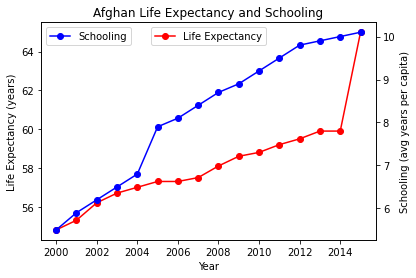

In [67]:
#plot life expectancy and schooling vs. year for Afghanistan (developing country)
#create figure and axis objects with subplots
fig, ax = plt.subplots()
#make plot for one of the y axes
line1 = ax.plot(afghan_df["Year"], afghan_df["Life Expectancy"], color = "red", marker = "o", label = "Life Expectancy")
#set x axis label
ax.set_xlabel("Year")
#set the first y axis label
ax.set_ylabel("Life Expectancy (years)")

#twin object for two different y-axis on the same plot
ax2 = ax.twinx()
#make plot for the second y axis
line2 = ax2.plot(afghan_df["Year"], afghan_df["Schooling"], color = "blue", marker = "o", label="Schooling")
#set x axis label
ax2.set_xlabel("Year")
#set the second y axis label
ax2.set_ylabel("Schooling (avg years per capita)")
ax2.set_title("Afghan Life Expectancy and Schooling")

ax.legend(loc = "upper center")
ax2.legend()

plt.show()

In [70]:
#create df of just Hungary
hungary_df = schooling_df.loc[schooling_df["Country"] == "Hungary"]
hungary_df.head()

,Country,Year,Status,Life Expectancy,Schooling
1154,Hungary,2015,Developed,75.8,15.6
1155,Hungary,2014,Developed,75.6,15.8
1156,Hungary,2013,Developed,75.5,15.4
1157,Hungary,2012,Developed,75.0,15.4
1158,Hungary,2011,Developed,74.8,15.4


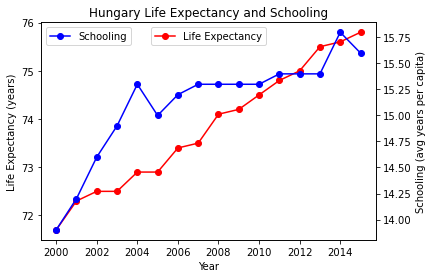

In [71]:
#plot life expectancy and schooling vs. year for Hungary (Developed)
#create figure and axis objects with subplots
fig_h, ax_h =  plt.subplots()
#make plot for one of the y axes
line1_h = ax_h.plot(hungary_df["Year"], hungary_df["Life Expectancy"], color = "red", marker = "o", label = "Life Expectancy")
#set x axis label
ax_h.set_xlabel("Year")
#set the first y axis label
ax_h.set_ylabel("Life Expectancy (years)")

#twin object for two different y-axis on the same plot
ax_h2 = ax_h.twinx()
#make plot for the second y axis
line2_h = ax_h2.plot(hungary_df["Year"], hungary_df["Schooling"], color = "blue", marker = "o", label="Schooling")
#set x axis label
ax_h2.set_xlabel("Year")
#set the second y axis label
ax_h2.set_ylabel("Schooling (avg years per capita)")
ax_h2.set_title("Hungary Life Expectancy and Schooling")

ax_h.legend(loc = "upper center")
ax_h2.legend()

plt.show()